## 1. Import & load libraries

In [1]:
%pip cache purge
%pip uninstall matplotlib -y

%pip install mne
%pip install matplotlib
%pip install numpy
%pip install pandas


Files removed: 3
Note: you may need to restart the kernel to use updated packages.
Found existing installation: matplotlib 3.10.0
Uninstalling matplotlib-3.10.0:
  Successfully uninstalled matplotlib-3.10.0
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.python.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 36.8 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.12.0 requires matplotlib<3.10,>=3.5, but you have matplotlib 3.10.0 which is incompatible.
ydata-profiling 4.12.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.15.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packag

In [2]:
pip list


Package                Version
---------------------- ------------------------------------
annotated-types        0.7.0
appdirs                1.4.4
asgiref                3.8.1
asttokens              2.4.1
attrs                  21.2.0
autobahn               21.11.1
Automat                20.2.0
Babel                  2.8.0
backcall               0.2.0
base58                 1.0.3
bcrypt                 3.2.0
beautifulsoup4         4.10.0
beniget                0.4.1
blinker                1.4
bottle                 0.12.25
Brotli                 1.0.9
cbor                   1.0.0
certifi                2020.6.20
cffi                   1.15.0
chardet                4.0.0
chrome-gnome-shell     0.0.0
click                  8.0.3
cloud-init             23.3.3
colorama               0.4.4
comm                   0.2.2
command-not-found      0.3
configobj              5.0.6
constantly             15.1.0
contourpy              1.3.1
cryptography           3.4.8
cupshelpers            1.0
cy

In [3]:
import mne

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import warnings

from mne.datasets import eegbci
from mne.io import read_raw_edf
from mne.io import concatenate_raws

from typing import List


# from mne.preprocessing import ICA

# from time import time


/home/dgerwig-/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## 2. Load data

In [4]:
def rename_channels(raw):
    """
    Rename channels in an MNE raw object to match the standard 1005 montage.
    This function removes non-standard characters (e.g., '.', '..') and ensures consistency with MNE’s standard channel naming conventions.
    """
    original_names = raw.ch_names

    # Cleaning function: removes ".", ".." and other non-alphanumeric characters
    def clean_name(name):
        return re.sub(r'[^A-Za-z0-9]', '', name)  # Removes any non-alphanumeric characters

    # Create a mapping dictionary for renaming
    mapping = {old_name: clean_name(old_name) for old_name in original_names if old_name != clean_name(old_name)}

    # Rename channels and print changes
    if mapping:
        print("\nRenaming channels:")
        for old_name, new_name in mapping.items():
            print(f"  {old_name} -> {new_name}")
        raw.rename_channels(mapping)
    else:
        print("No channels needed renaming.")

    return raw



In [5]:
def load_data(subjects: List[int], runs: List[int]) -> mne.io.Raw:
    """
    Load and preprocess EEG data for given subjects and runs.

    Parameters:
    -----------
    subjects : List[int]
        List of subject IDs to load.
    runs : List[int]
        List of run IDs to load.

    Returns:
    --------
    raw : mne.io.Raw
        Concatenated raw EEG data from all subjects.
    """
    all_raws = []

    for subject in subjects:
        print(f"\n=== Loading data for subject {subject} ===")
        try:
            raw_fnames = mne.datasets.eegbci.load_data(subject, runs)
            raws = [mne.io.read_raw_edf(f, preload=True, verbose=True) for f in raw_fnames]  
            raw = mne.concatenate_raws(raws)
        except Exception as e:
            warnings.warn(f"Skipping subject {subject} due to an error: {e}")
            continue

        # Rename channels to match the standard montage
        rename_channels(raw)

        # Set standard montage
        try:
            raw.set_montage("standard_1005", on_missing="ignore")
        except Exception as e:
            warnings.warn(f"Could not set montage for subject {subject}: {e}")

        all_raws.append(raw)

    if not all_raws:
        raise ValueError("No valid EEG data loaded. Check subject and run IDs.")

    # Concatenate all subjects' data
    return mne.concatenate_raws(all_raws)


In [6]:
subjects = [1]
runs = 3

raw_data = load_data(subjects, runs)



=== Loading data for subject 1 ===
Extracting EDF parameters from /home/dgerwig-/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...

Renaming channels:
  Fc5. -> Fc5
  Fc3. -> Fc3
  Fc1. -> Fc1
  Fcz. -> Fcz
  Fc2. -> Fc2
  Fc4. -> Fc4
  Fc6. -> Fc6
  C5.. -> C5
  C3.. -> C3
  C1.. -> C1
  Cz.. -> Cz
  C2.. -> C2
  C4.. -> C4
  C6.. -> C6
  Cp5. -> Cp5
  Cp3. -> Cp3
  Cp1. -> Cp1
  Cpz. -> Cpz
  Cp2. -> Cp2
  Cp4. -> Cp4
  Cp6. -> Cp6
  Fp1. -> Fp1
  Fpz. -> Fpz
  Fp2. -> Fp2
  Af7. -> Af7
  Af3. -> Af3
  Afz. -> Afz
  Af4. -> Af4
  Af8. -> Af8
  F7.. -> F7
  F5.. -> F5
  F3.. -> F3
  F1.. -> F1
  Fz.. -> Fz
  F2.. -> F2
  F4.. -> F4
  F6.. -> F6
  F8.. -> F8
  Ft7. -> Ft7
  Ft8. -> Ft8
  T7.. -> T7
  T8.. -> T8
  T9.. -> T9
  T10. -> T10
  Tp7. -> Tp7
  Tp8. -> Tp8
  P7.. -> P7
  P5.. -> P5
  P3.. -> P3
  P1.. -> P1
  Pz.. -> Pz
  P

In [7]:
print(raw_data.info)


<Info | 9 non-empty values
 bads: []
 ch_names: Fc5, Fc3, Fc1, Fcz, Fc2, Fc4, Fc6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 39 items (3 Cardinal, 36 EEG)
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>


In [8]:
# Set montage to ensure valid channel positions
montage = mne.channels.make_standard_montage('standard_1005')
raw_data.set_montage(montage, on_missing='ignore')


<RawEDF | S001R03.edf, 64 x 20000 (125.0 s), ~9.8 MiB, data loaded>

In [9]:
# Show the events
events, event_id = mne.events_from_annotations(raw_data)
print(event_id)


Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
{np.str_('T0'): 1, np.str_('T1'): 2, np.str_('T2'): 3}


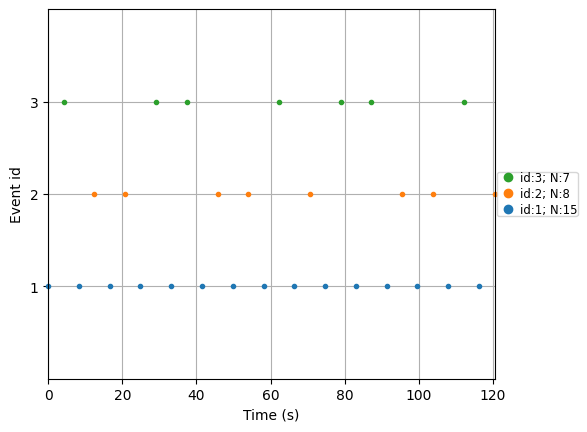

In [10]:
# Plot the events
mne.viz.plot_events(events, sfreq=raw_data.info['sfreq']);


In [11]:
# Select only EEG channels
picks = mne.pick_types(raw_data.info, meg=False, eeg=True, stim=False, eog=False, exclude='bads')
print(picks)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


In [12]:
# Plot the topographic map
raw_data.plot_sensors(show_names=True, kind='topomap', ch_type='eeg')


ImportError: cannot import name 'docstring' from 'matplotlib' (/home/dgerwig-/.local/lib/python3.10/site-packages/matplotlib/__init__.py)